In [1]:
import torch
from torch.utils.data import DataLoader
import torchvision
from torchvision import transforms
import matplotlib.pyplot as plt

In [2]:
transform = transforms.ToTensor()

dataset = torchvision.datasets.DTD(root="data/dtd", download=True, transform=transform)

dataloader = DataLoader(dataset, batch_size=64, shuffle=True)

In [3]:
# Statistics
from torchvision.transforms import Resize
print(f"Number of classes: {len(dataset.classes)}")
print(f"Class names: {dataset.classes}")
print(f"Total number of images: {len(dataset)}")

resize_transform = transforms.Compose([
    transforms.ToTensor(),
    Resize((224, 224))
])

resized_dataset = torchvision.datasets.DTD(root="data/dtd", download=False, transform=resize_transform)
resized_dataloader = DataLoader(resized_dataset, batch_size=64, shuffle=True)

mean = torch.zeros(3)
std = torch.zeros(3)
total_images = 0
for images, _ in resized_dataloader:
    batch_samples = images.size(0)
    images = images.view(batch_samples, images.size(1), -1)
    mean += images.mean(2).sum(0)
    std += images.std(2).sum(0)
    total_images += batch_samples
mean /= total_images
std /= total_images
print(f"Mean: {mean}")
print(f"Std: {std}")



Number of classes: 47
Class names: ['banded', 'blotchy', 'braided', 'bubbly', 'bumpy', 'chequered', 'cobwebbed', 'cracked', 'crosshatched', 'crystalline', 'dotted', 'fibrous', 'flecked', 'freckled', 'frilly', 'gauzy', 'grid', 'grooved', 'honeycombed', 'interlaced', 'knitted', 'lacelike', 'lined', 'marbled', 'matted', 'meshed', 'paisley', 'perforated', 'pitted', 'pleated', 'polka-dotted', 'porous', 'potholed', 'scaly', 'smeared', 'spiralled', 'sprinkled', 'stained', 'stratified', 'striped', 'studded', 'swirly', 'veined', 'waffled', 'woven', 'wrinkled', 'zigzagged']
Total number of images: 1880
Mean: tensor([0.5288, 0.4730, 0.4247])
Std: tensor([0.1688, 0.1694, 0.1653])


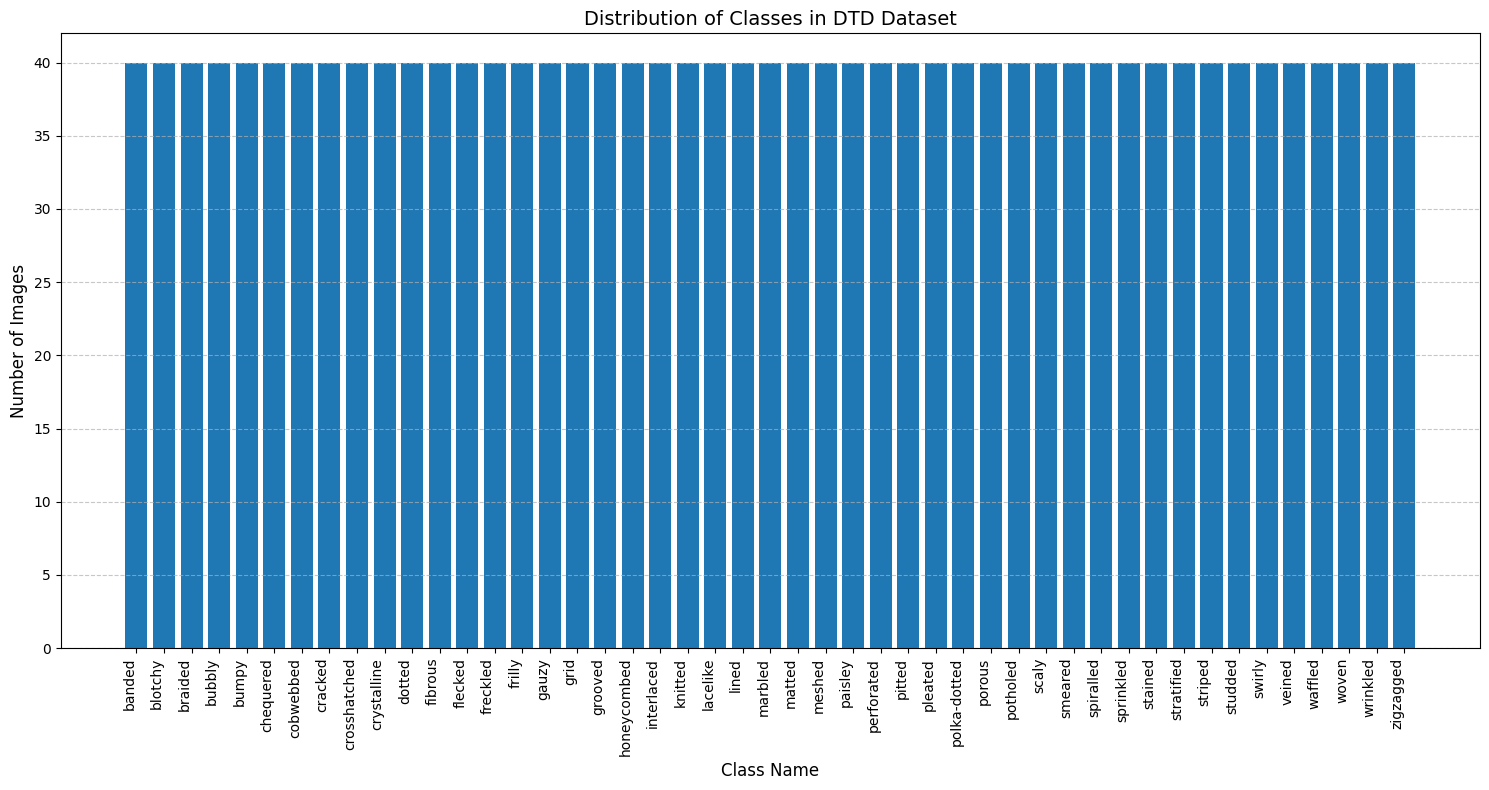

In [4]:
from collections import Counter

labels = [dataset[i][1] for i in range(len(dataset))]
class_labels = labels

class_counts = Counter(class_labels)

sorted_class_indices = sorted(class_counts.keys())
sorted_class_names = [dataset.classes[i] for i in sorted_class_indices]
sorted_counts = [class_counts[i] for i in sorted_class_indices]

plt.figure(figsize=(15, 8))
plt.bar(sorted_class_names, sorted_counts)

plt.xlabel("Class Name", fontsize=12)
plt.ylabel("Number of Images", fontsize=12)
plt.title("Distribution of Classes in DTD Dataset", fontsize=14)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

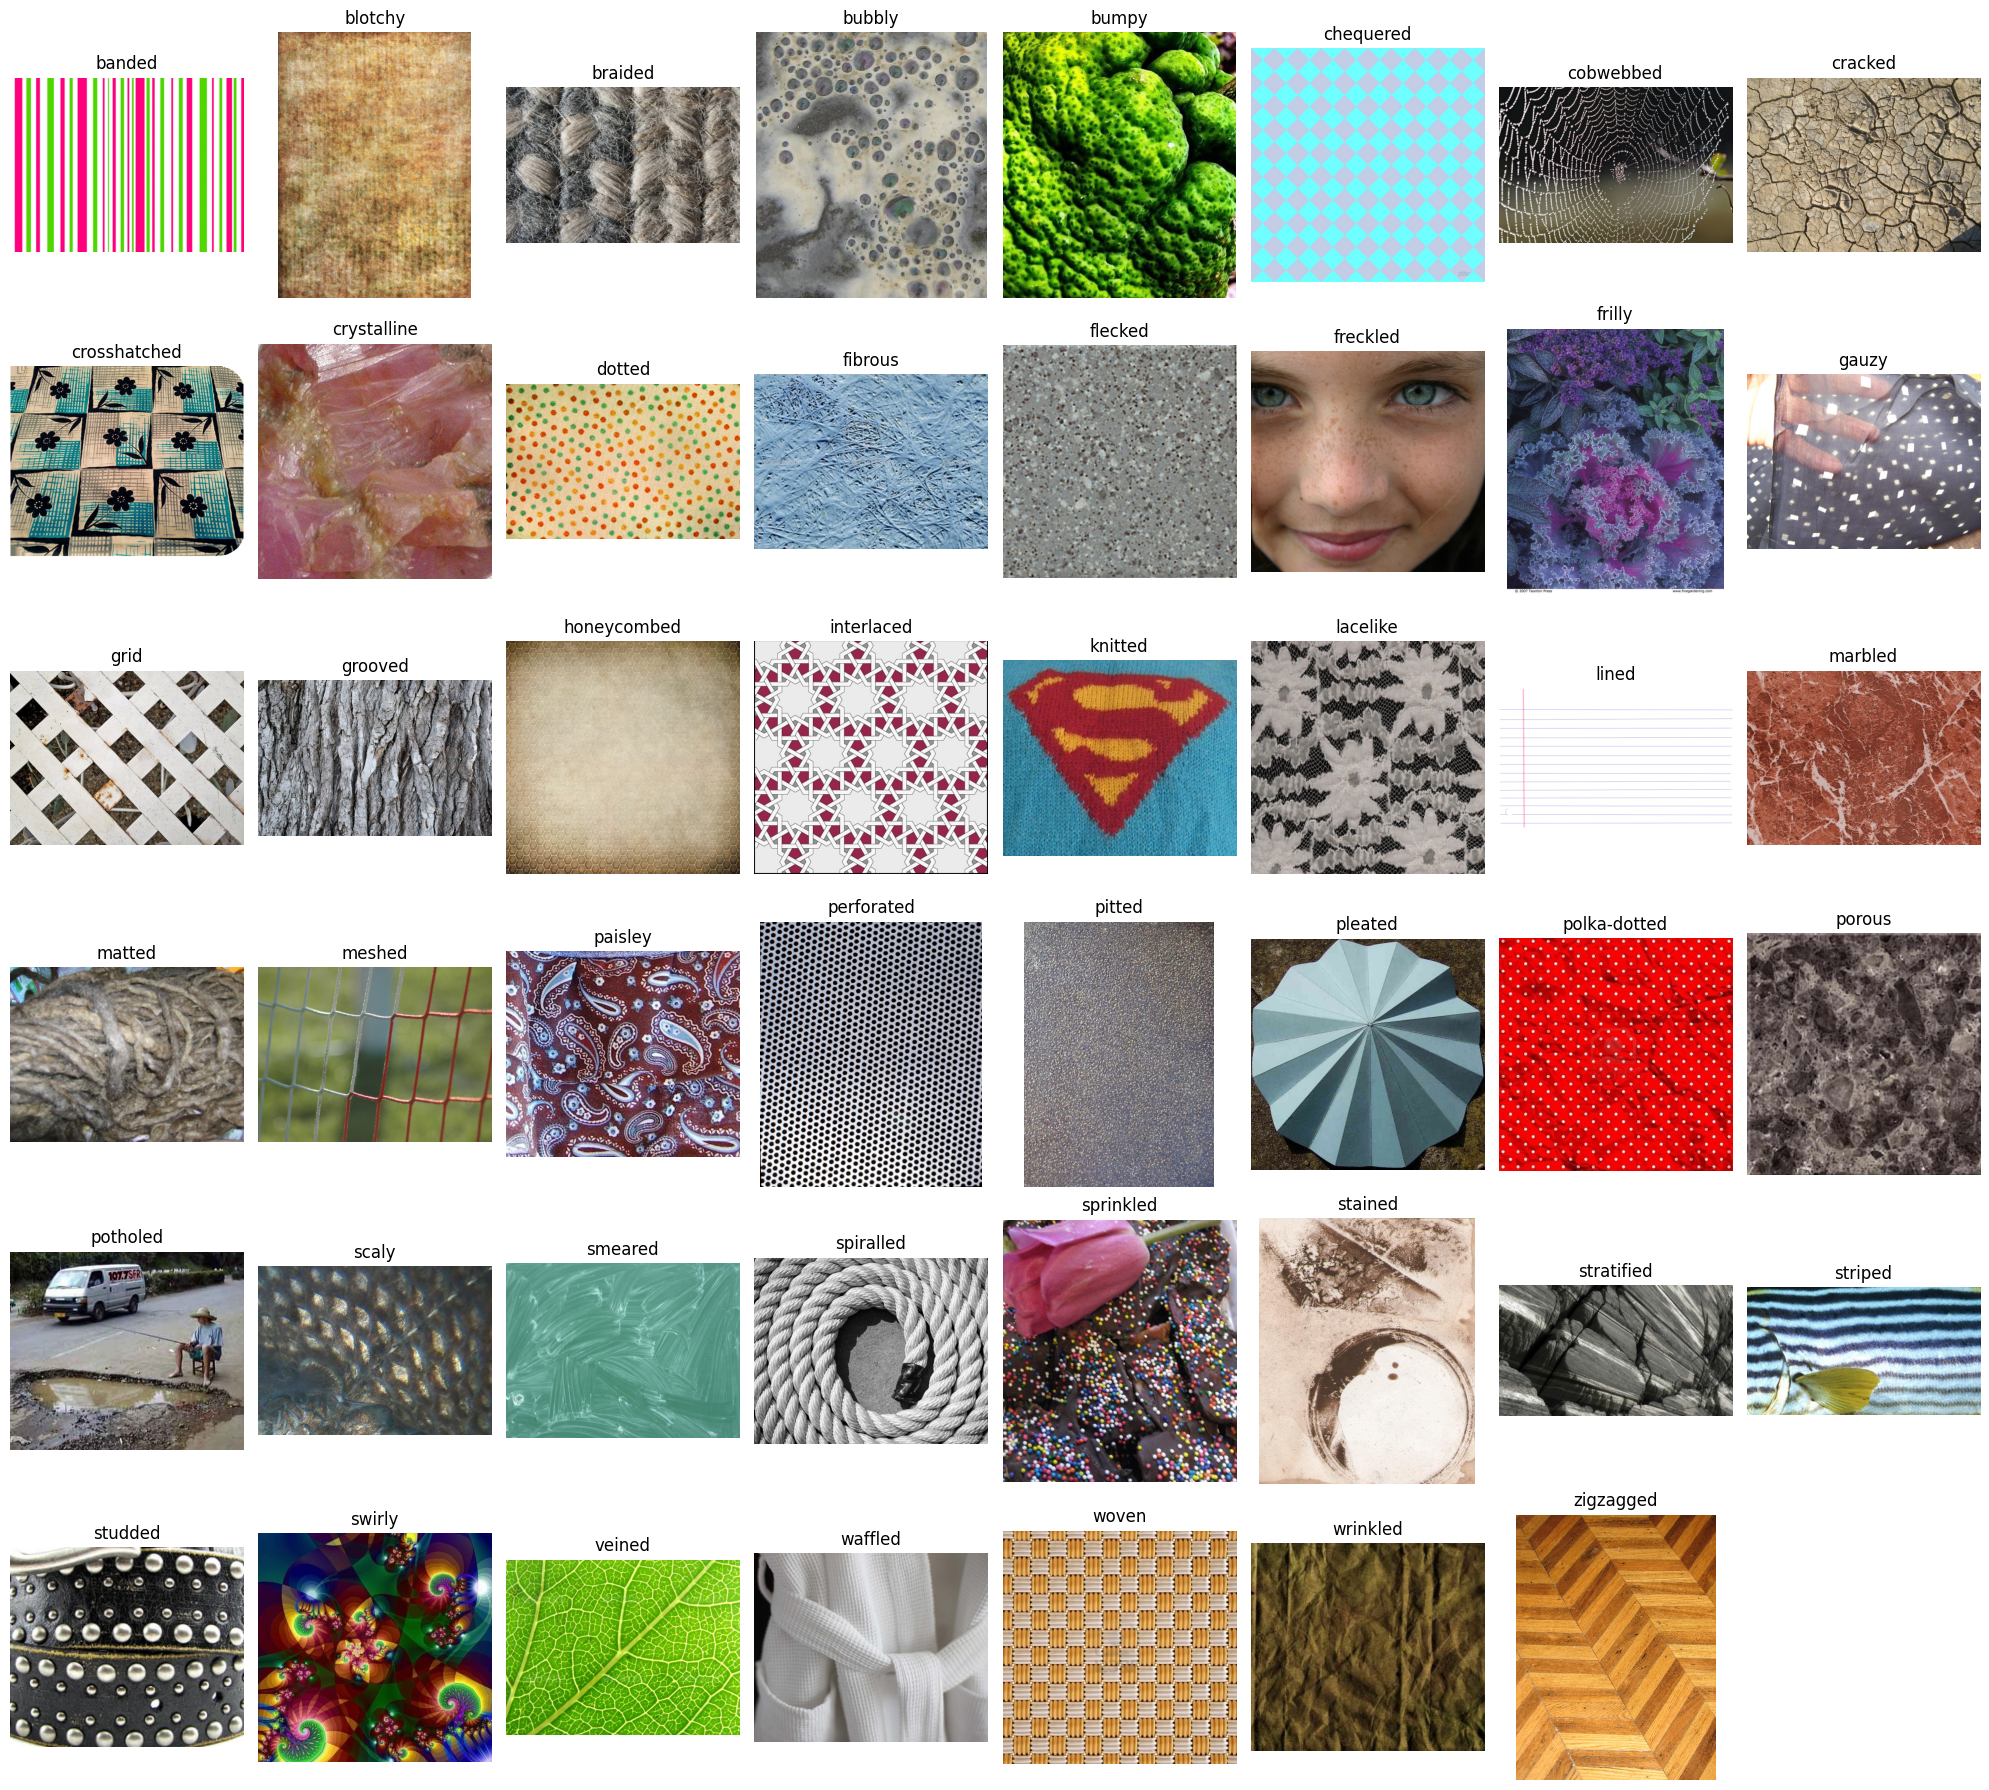

In [5]:
# Print the first image for each class
num_classes = len(dataset.classes)
cols = 8
rows = (num_classes + cols - 1) // cols
fig, axes = plt.subplots(nrows=rows, ncols=cols, figsize=(20, 3*rows))
axes = axes.flatten()
seen_classes = set()
for img, label in dataset:
    if label not in seen_classes:
        idx = len(seen_classes)
        if idx >= len(axes):
            break
        ax = axes[idx]
        ax.imshow(img.permute(1, 2, 0))
        ax.set_title(dataset.classes[label])
        ax.axis('off')
        seen_classes.add(label)
    if len(seen_classes) == num_classes:
        break
for ax in axes[len(seen_classes):]:
    ax.axis('off')
plt.tight_layout()
plt.show()

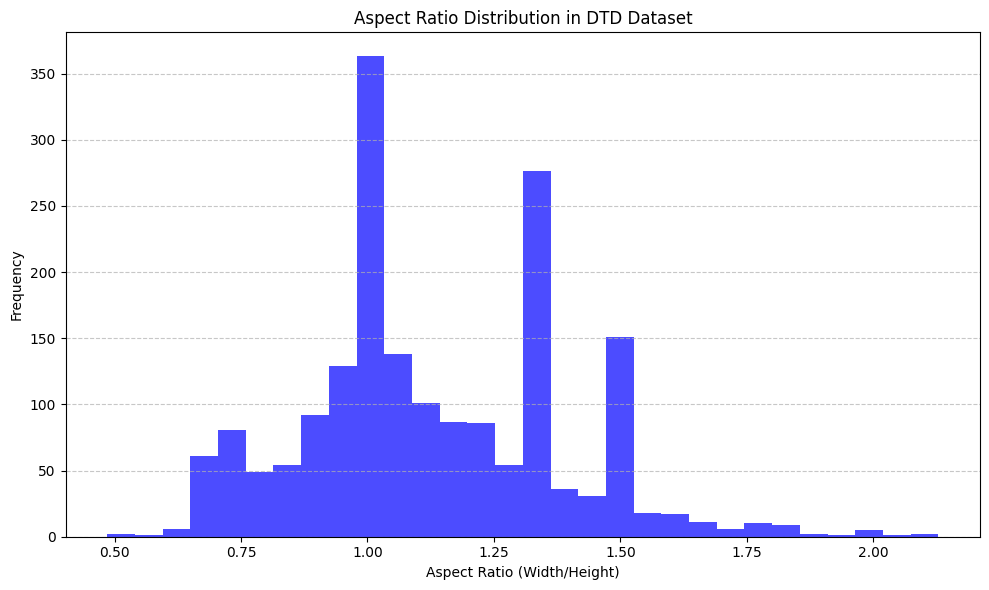

Mean Height: 453.35, Mean Width: 500.01
Min Height: 231, Max Height: 701
Min Width: 300, Max Width: 800
Aspect Ratio - Min: 0.49, Max: 2.13


In [6]:
heights = []
widths = []
for i in range(len(dataset)):
    image, label = dataset[i]
    heights.append(image.shape[1])
    widths.append(image.shape[2])
mean_height = sum(heights) / len(heights)
mean_width = sum(widths) / len(widths)

min_height = min(heights)
max_height = max(heights)

min_width = min(widths)
max_width = max(widths)

aspect_ratios = [w / h for w, h in zip(widths, heights)]
plt.figure(figsize=(10, 6))
plt.hist(aspect_ratios, bins=30, color='blue', alpha=0.7)
plt.xlabel("Aspect Ratio (Width/Height)")
plt.ylabel("Frequency")
plt.title("Aspect Ratio Distribution in DTD Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

print(f"Mean Height: {mean_height:.2f}, Mean Width: {mean_width:.2f}")
print(f"Min Height: {min_height}, Max Height: {max_height}")
print(f"Min Width: {min_width}, Max Width: {max_width}")
print(f"Aspect Ratio - Min: {min(aspect_ratios):.2f}, Max: {max(aspect_ratios):.2f}")


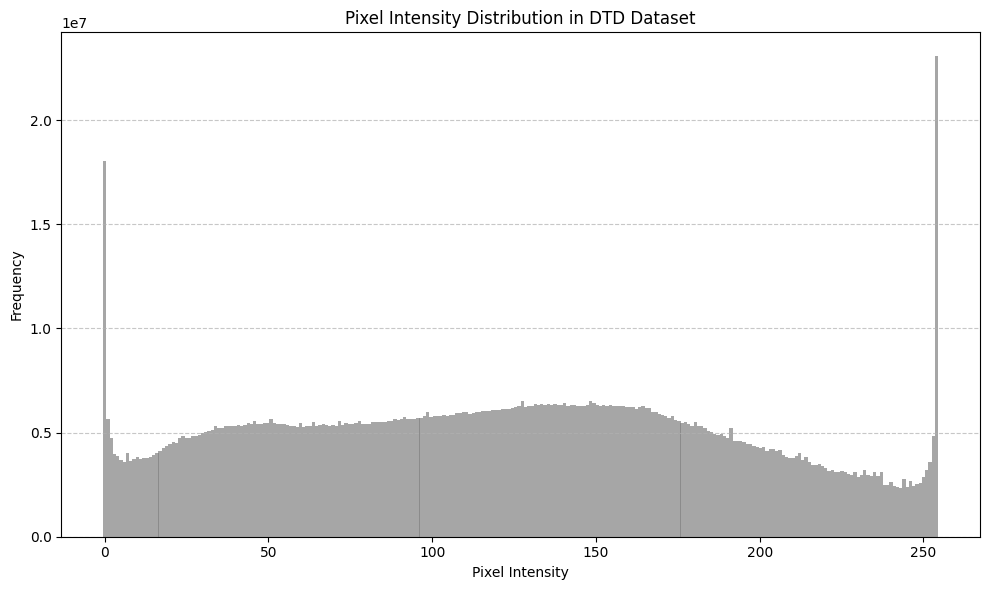

In [7]:
# Pixel Intensity Analysis
import numpy as np
hist_counts, bin_edges = np.histogram([], bins=256, range=(0, 255))
for i in range(len(dataset)):
    image, label = dataset[i]
    data = image.view(-1).numpy() * 255
    new_counts, _ = np.histogram(data, bins=256, range=(0, 255))
    hist_counts += new_counts

plt.figure(figsize=(10, 6))
plt.bar(bin_edges[:-1], hist_counts, width=1, color='gray', alpha=0.7)
plt.xlabel("Pixel Intensity")
plt.ylabel("Frequency")
plt.title("Pixel Intensity Distribution in DTD Dataset")
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

Correlation between Red and Green channels: 0.8156
Correlation between Red and Blue channels: 0.6836
Correlation between Green and Blue channels: 0.8543


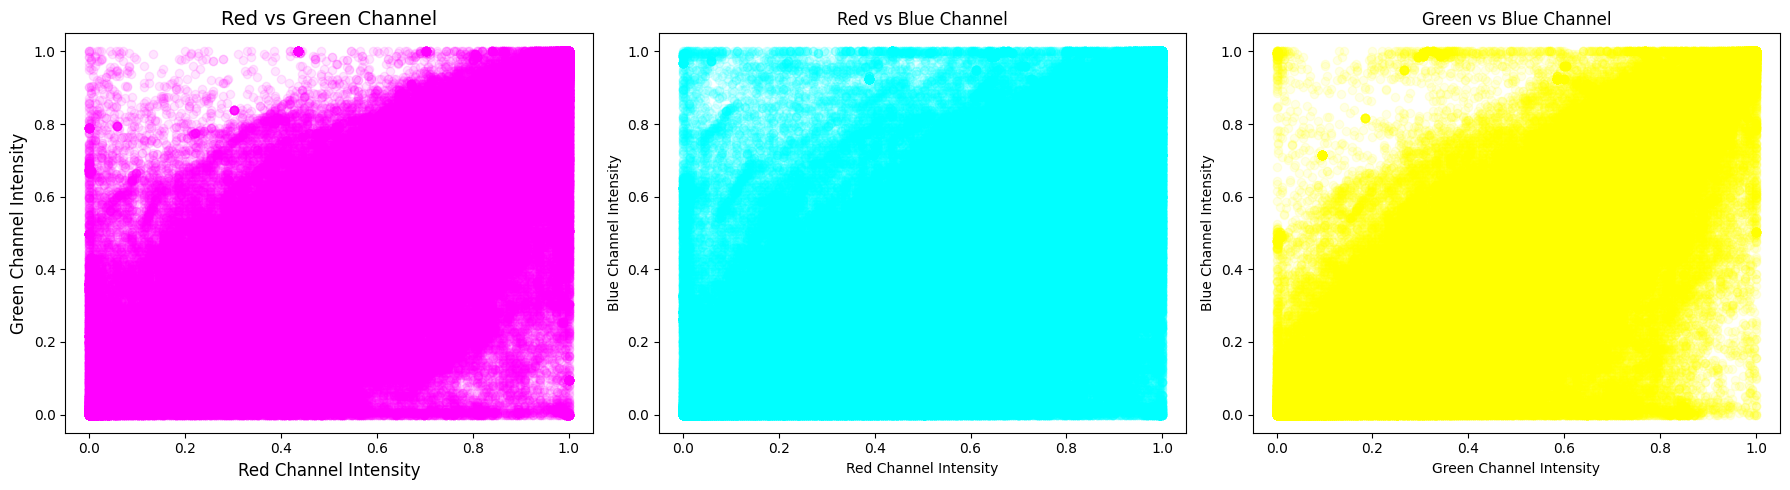

In [8]:
# Run Correlation Analysis Between Color Channels
r_tensors = []
g_tensors = []
b_tensors = []

for i in range(len(dataset)):
    image, label = dataset[i]
    r_tensors.append(image[0].view(-1).cpu().numpy())
    g_tensors.append(image[1].view(-1).cpu().numpy())
    b_tensors.append(image[2].view(-1).cpu().numpy())

red_channel = np.concatenate(r_tensors)
green_channel = np.concatenate(g_tensors)
blue_channel = np.concatenate(b_tensors)

corr_rg = np.corrcoef(red_channel, green_channel)[0, 1]
corr_rb = np.corrcoef(red_channel, blue_channel)[0, 1]
corr_gb = np.corrcoef(green_channel, blue_channel)[0, 1]
print(f"Correlation between Red and Green channels: {corr_rg:.4f}")
print(f"Correlation between Red and Blue channels: {corr_rb:.4f}")
print(f"Correlation between Green and Blue channels: {corr_gb:.4f}")
# Visualize Correlation with Scatter Plots
plt.figure(figsize=(18, 5))
plt.subplot(1, 3, 1)
plt.scatter(red_channel[::1000], green_channel[::1000], alpha=0.1, color='magenta')
plt.xlabel("Red Channel Intensity", fontsize=12)
plt.ylabel("Green Channel Intensity", fontsize=12)
plt.title("Red vs Green Channel", fontsize=14)
plt.subplot(1, 3, 2)
plt.scatter(red_channel[::1000], blue_channel[::1000], alpha=0.1, color='cyan')
plt.xlabel("Red Channel Intensity")
plt.ylabel("Blue Channel Intensity")
plt.title("Red vs Blue Channel")
plt.subplot(1, 3, 3)
plt.scatter(green_channel[::1000], blue_channel[::1000], alpha=0.1, color='yellow')
plt.xlabel("Green Channel Intensity")
plt.ylabel("Blue Channel Intensity")
plt.title("Green vs Blue Channel")
plt.tight_layout()
plt.show()

In [9]:
# Run PCA Analysis on Color Channels
from sklearn.decomposition import PCA
color_data = np.array([red_channel, green_channel, blue_channel]).T
pca = PCA(n_components=3)
pca.fit(color_data)
explained_variance = pca.explained_variance_ratio_
print("Explained variance by each principal component:")
for i, var in enumerate(explained_variance):
    print(f"PC{i+1}: {var:.4f}")

Explained variance by each principal component:
PC1: 0.8558
PC2: 0.1082
PC3: 0.0360
